<a href="https://colab.research.google.com/github/devreon/OpenCV-blur-filter/blob/main/blurfilteropencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Подготовка изображения.

Загружаем библиотеки, которые будем использовать.

In [ ]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

# Importing Image and ImageFilter module from pIL package 
from PIL import Image, ImageFilter

Используем rgb изображение по ссылке.

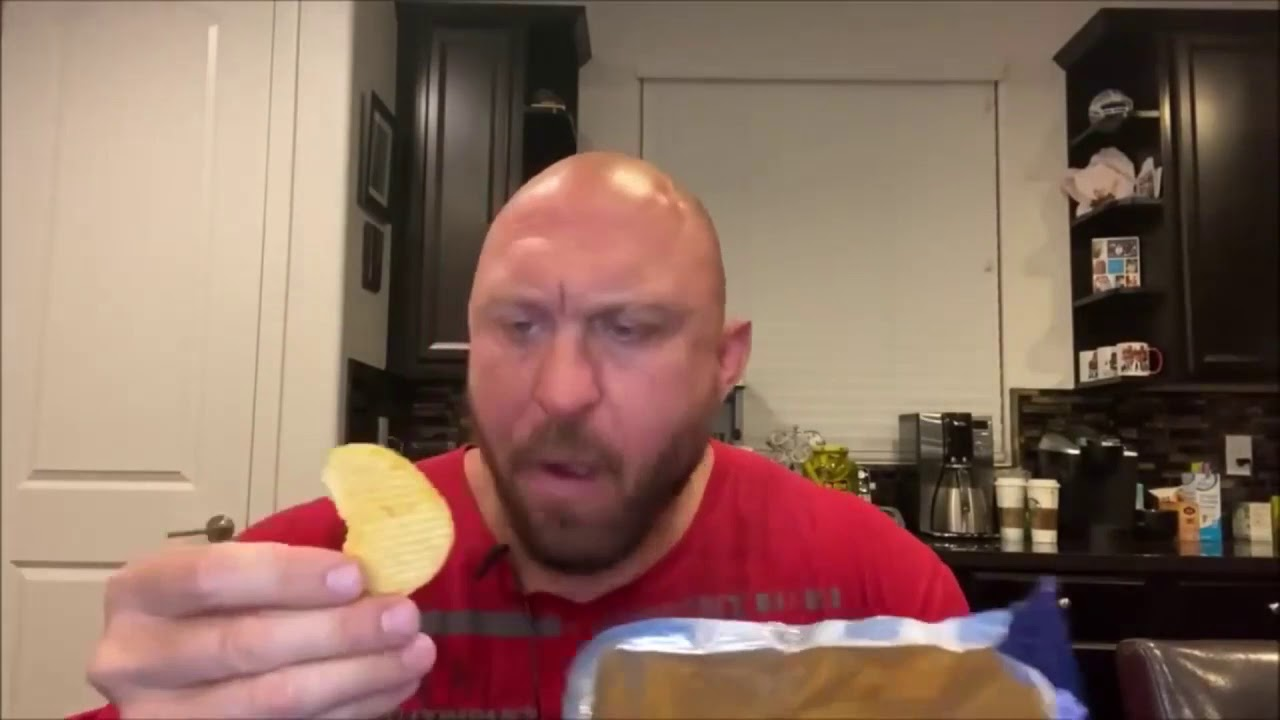

In [ ]:
url = r'https://i.ytimg.com/vi/QSOk6gBelAg/maxresdefault.jpg'
resp = requests.get(url, stream = True).raw
image = np.asarray(bytearray(resp.read()), dtype = "uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
cv2_imshow(image)

Вычислим размеры изображения 

In [ ]:
width, height = image.shape[:2]
print(width)
print(height)

720
1280


# Описание фильтра cv2.blur() в библиотеке OpenCV

cv.blur(	src, ksize[, dst[, anchor[, borderTysize_ie]]]	) ->	dst.
Функция размывает изображение с использованием ядра.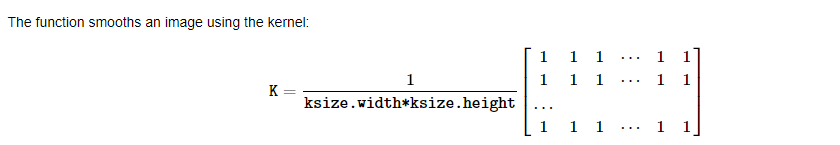

**Параметры:**
*   src - входное изображение.
*   dst - выводит изображение того же размера и типа, что и src.
*   ksize - размер размывающего ядра.
*   anchor - точка привязки; значение по умолчанию size_ioint (-1, -1) означает, что привязка находится в центре ядра.
*   borderTysize_ie - режим границы, используемый для экстраполяции пикселей за пределы изображения.


# Использование cv2.blur()

Применим размытие к изображению, используя встриоенную cv2 функцию

In [ ]:
#размер ядра размытия(размер матрицы, по которой считаем среднее арифметическое)
ksize = 9


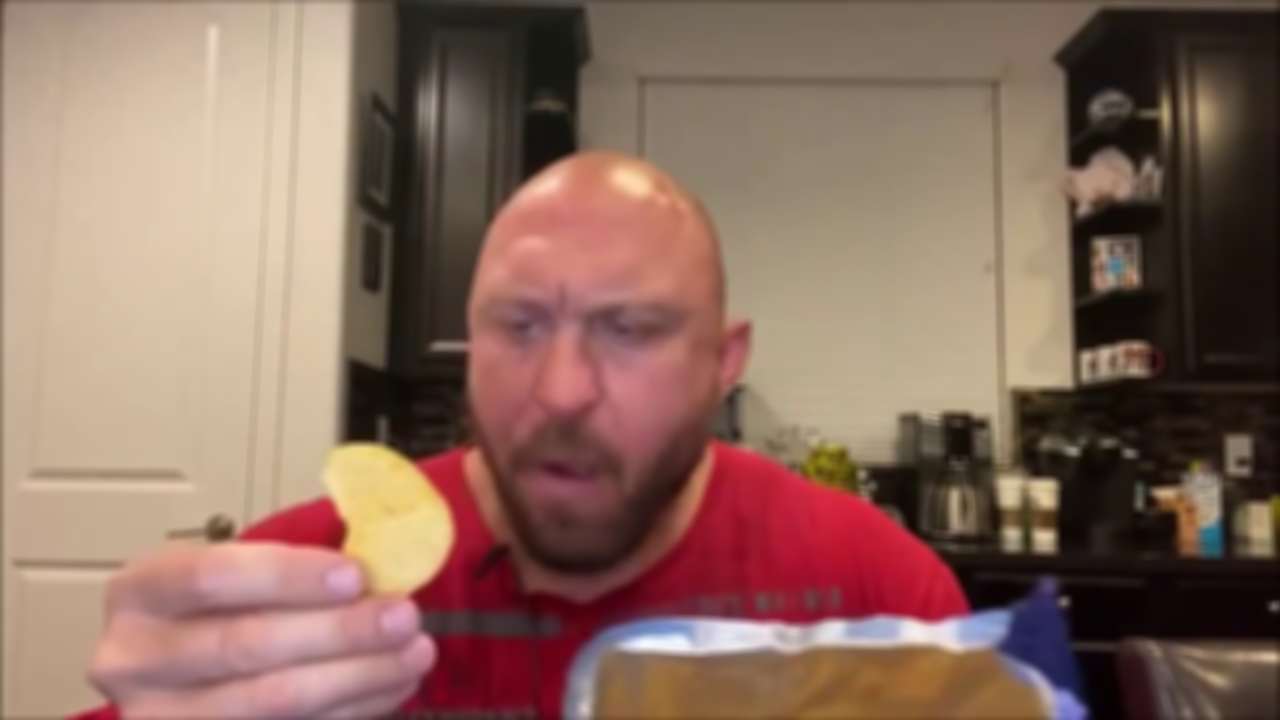

In [ ]:
#Используем cv2 библиотеку
cv2_image = cv2.blur(image, (ksize,ksize), borderType = cv2.BORDER_REPLICATE)
#Выведем результат
cv2_imshow(cv2_image)

Как мы видим, cv2 размытие работает верно


# Создание собственной blur функции


**Входные данные**
*   image - входное изображение.
*   ksize - размер размывающего ядра.


**Выходные данные**
*    user_image- полученная пользоваетльским фильтром картинка
 

In [ ]:
#расширенная картинка с увеличенным размером, в центре которой исходная картинка
new_filled_image = np.zeros([width+ksize-1, height + ksize-1, 3], dtype=np.uint8)
for i in range(ksize // 2, width + ksize // 2):
    for j in range(ksize // 2, height + ksize // 2):
      new_filled_image [i,j] = image [i - ksize // 2, j - ksize // 2]
#параметры начала и конца работы цикла
start_i = ksize // 2 - 1
start_j = ksize // 2 - 1
new_image_width = width + ksize//2
new_image_height = height + ksize//2
image_ksize = 3
while image_ksize <= ksize:
  for i in range(start_i, new_image_width+1, 1):
    for j in range(start_j, new_image_height+1, 1):
      #верхняя левая граница new_filled_image
      if i == start_i and j == start_j:
        new_filled_image[i,j] = new_filled_image[i+1,j+1]
      # верхняя граница new_filled_image
      elif i == start_i and j != start_j and j != new_image_height:
        new_filled_image[i,j] = new_filled_image[i+1,j]
      #правая граница new_filled_image
      elif j == new_image_height and i != start_i and i != new_image_width:
        new_filled_image[i,j] = new_filled_image[i,j-1]
      #нижняя граница new_filled_image
      elif i == new_image_width and j != start_j and j != new_image_height:
        new_filled_image[i,j] = new_filled_image[i-1,j]
      #левая граница new_filled_image
      elif j == start_j and i != start_i and i != new_image_width:
        new_filled_image[i,j] = new_filled_image[i,j+1]
      #верхняя правая граница new_filled_image
      elif i == start_i and j == new_image_height:
        new_filled_image[i,j] = new_filled_image[i+1,j-1]
      #нижняя правая граница new_filled_image
      elif i == new_image_width and j == new_image_height:
        new_filled_image[i,j] = new_filled_image[i-1,j-1]
      #нижняя левая граница new_filled_image
      elif i == new_image_width and j == start_j:
        new_filled_image[i,j] = new_filled_image[i-1,j+1]
  #следующие границы
  start_i = start_i - 1
  start_j = start_j - 1
  new_image_width = new_image_width+1
  new_image_height = new_image_height+1
  image_ksize = image_ksize + 2


Созданим пустую картинку для записи размытых пикселей.

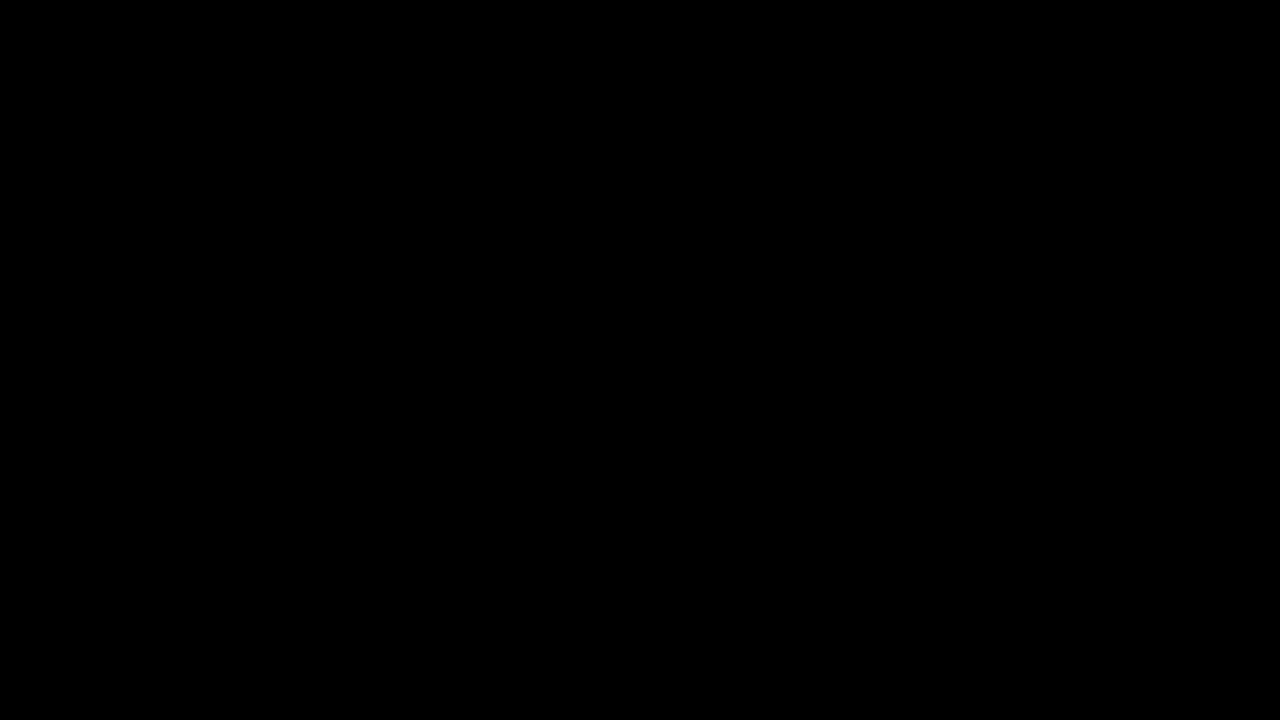

In [ ]:
user_image = np.zeros([width, height, 3], dtype=np.uint8) #создание черной картинки
cv2_imshow(user_image)

**Как происходят вычисления blur()**
*    new_filled_image[i,j]= (SumRed/kernel_pixel_sum , SumBlue/kernel_pixel_sum, SumGreen/kernel_pixel_sum)
*    kernel_pixel_sum - количество пикселей в ядре для вычисления 
*    SumRed - сумма красного цвета 
*    SumGreen - сумма зеленого цвета 
*    SumBlue - сумма синего цвета 

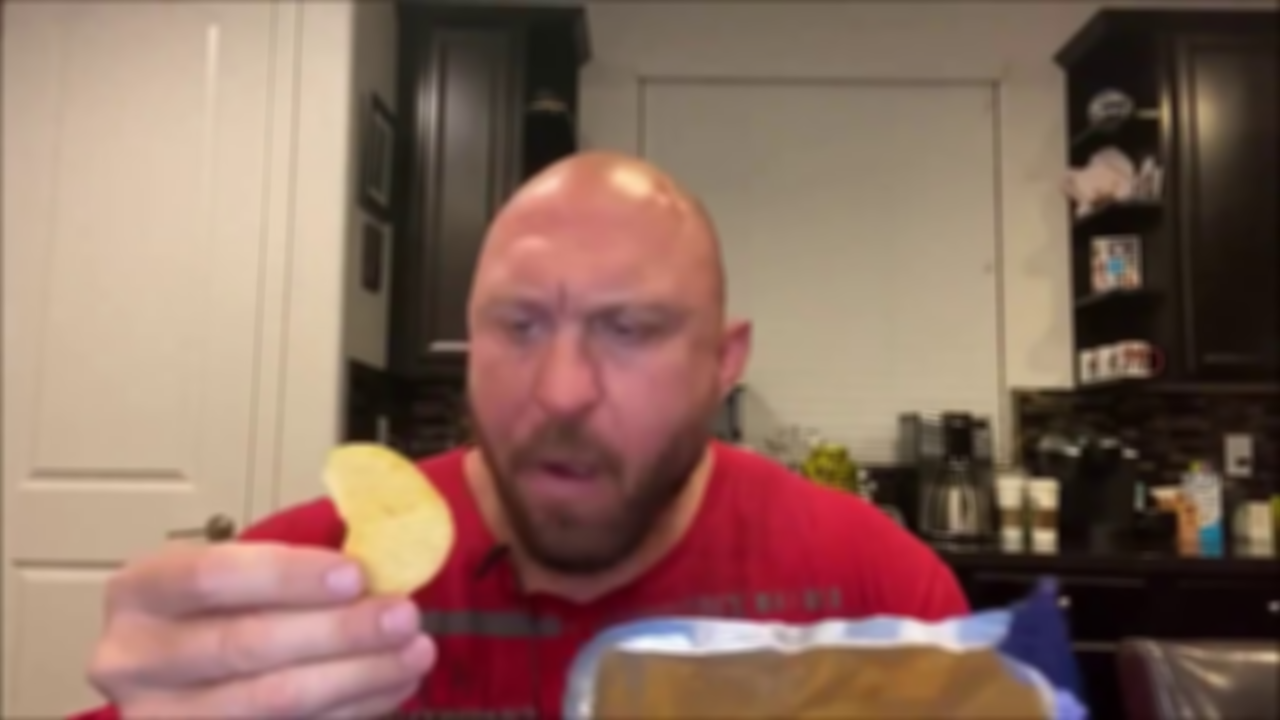

In [ ]:
#количество пикселей в матрице-ядре для вычисления ср. арифметического
kernel_pixel_sum = ksize*ksize
#число, на которое будет отступать счетчик
change = ksize // 2
for i in range(width):
  for j in range(height):
    (B, G, R) = (0, 0, 0)
    for size_i in range(i - change, i + change + 1):
      for size_j in range(j - change, j + change + 1):
        (B, G, R)  = (B, G, R)  + new_filled_image[size_i + change, size_j  + change]
    user_image[i,j] = (B/kernel_pixel_sum , G/kernel_pixel_sum , R/kernel_pixel_sum )

#размытая картинка
cv2_imshow(user_image)

# Сравнение полученных результатов

Для проверки результата, вычтем из созданного OpenCV изображения пользовательское. Заметим, что должно получиться полностью черное изображение

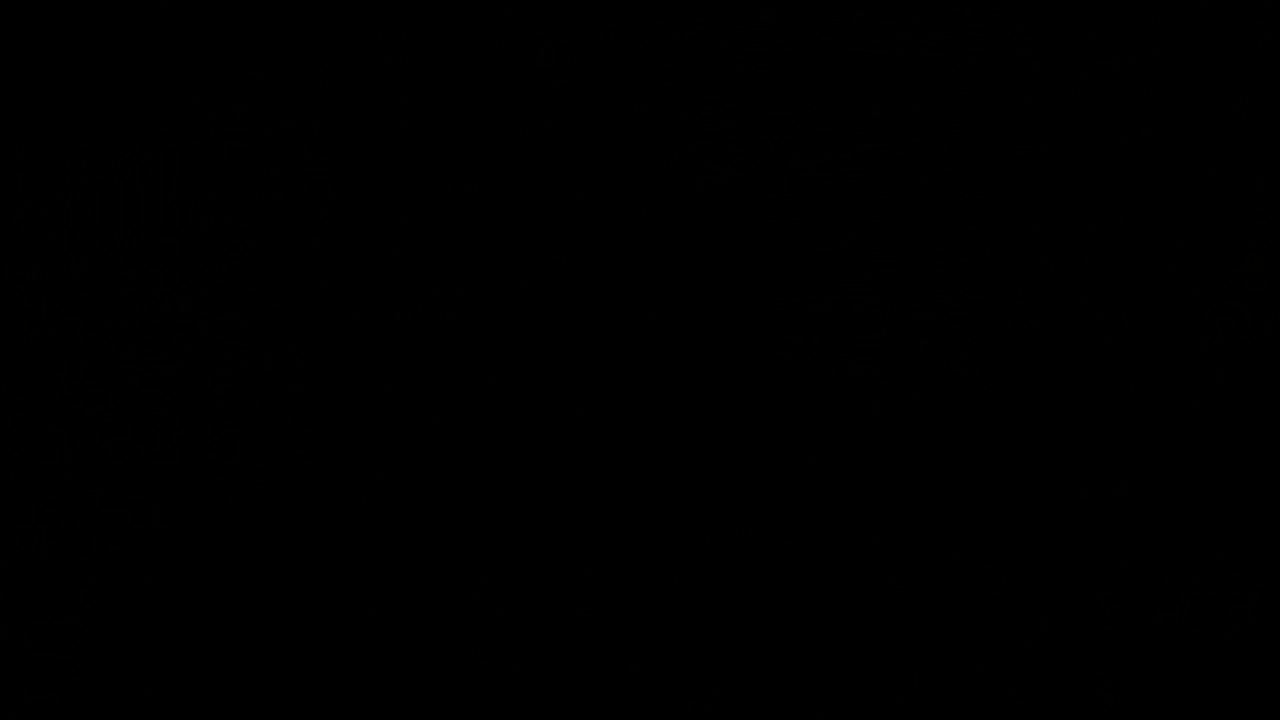

In [ ]:
cv2_imshow(cv2_image-user_image)